# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [7]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import patsy
from patsy import dmatrices

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [10]:
# Ajustando o modelo inicial
model_1 = smf.ols("tip ~ sex + smoker + time + net_bill", data=tips).fit()
print("Modelo inicial:")
print(model_1.summary())

# Remoção das variáveis não significativas
formula_reduzida = "tip ~ net_bill"
y_reduzida, X_reduzida = dmatrices(formula_reduzida, data=tips, return_type='dataframe')
modelo_reduzido = sm.OLS(y_reduzida, X_reduzida).fit()



Modelo inicial:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        14:26:51   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999   

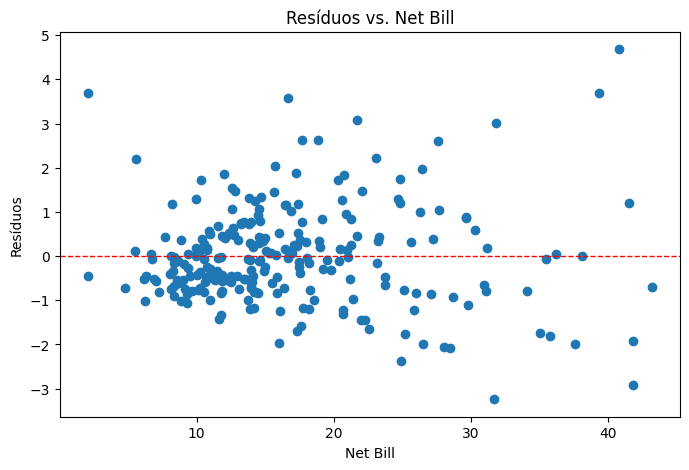

In [ ]:
# Gráfico de resíduos em função de net_bill
plt.figure(figsize=(8, 5))
plt.scatter(tips['net_bill'], model_1.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs. Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
# Transformações: log e polinômio
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # +1 para evitar log(0)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando modelo com log
model_log = smf.ols("tip ~ sex + smoker + time + log_net_bill", data=tips).fit()
print("Modelo com transformação log:")
print(model_log.summary())

Modelo com transformação log:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     26.29
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           4.49e-18
Time:                        14:04:33   Log-Likelihood:                -380.47
No. Observations:                 244   AIC:                             770.9
Df Residuals:                     239   BIC:                             788.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

In [ ]:
# Ajustando modelo polinomial
model_poly = smf.ols("tip ~ sex + smoker + time + net_bill + net_bill_squared", data=tips).fit()
print("Modelo com transformação polinomial:")
print(model_poly.summary())

Modelo com transformação polinomial:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     24.15
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.22e-19
Time:                        14:04:45   Log-Likelihood:                -374.88
No. Observations:                 244   AIC:                             761.8
Df Residuals:                     238   BIC:                             782.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Int

O Modelo Polinominal teve a melhor resposta.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
# Criando a matriz de design (X) e a matriz dependente (y) com Patsy
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + time + net_bill", data=tips, return_type="dataframe")

# Ajustando o modelo inicial
model_patsy = sm.OLS(y, X).fit()
print("Modelo inicial com log(tip):")
print(model_patsy.summary())

# Identificar variáveis significativas e refazer o modelo
# Removendo variáveis não significantes (p > 0.05) e ajustando o modelo novamente
y, X_significant = patsy.dmatrices("np.log(tip) ~ net_bill", data=tips, return_type="dataframe")
model_significant = sm.OLS(y, X_significant).fit()
print("\nModelo com variáveis significativas:")
print(model_significant.summary())


Modelo inicial com log(tip):
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.21e-18
Time:                        14:12:08   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      

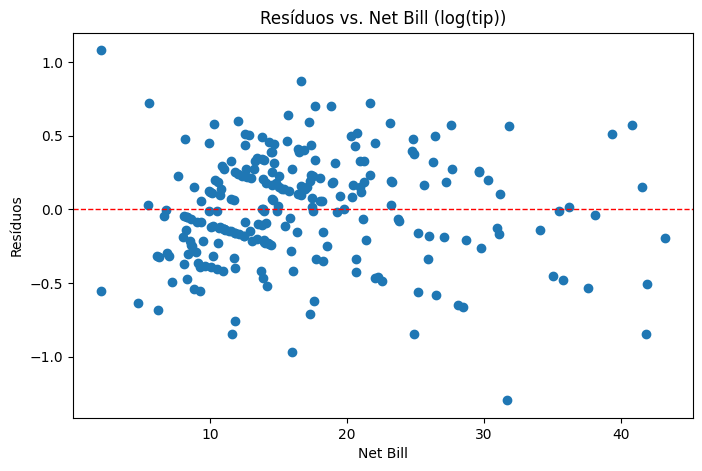

In [ ]:

# Gráfico de resíduos em função de net_bill
plt.figure(figsize=(8, 5))
plt.scatter(tips['net_bill'], model_significant.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs. Net Bill (log(tip))')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()



In [ ]:
# Testando transformações em net_bill
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # +1 para evitar log(0)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Modelo com log(net_bill)
y, X_log = patsy.dmatrices("np.log(tip) ~ log_net_bill", data=tips, return_type="dataframe")
model_log = sm.OLS(y, X_log).fit()

# Modelo polinomial com net_bill
y, X_poly = patsy.dmatrices("np.log(tip) ~ net_bill + net_bill_squared", data=tips, return_type="dataframe")
model_poly = sm.OLS(y, X_poly).fit()

print("\nModelo com log(net_bill):")
print(model_log.summary())

print("\nModelo polinomial:")
print(model_poly.summary())


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.74e-22
Time:                        14:12:31   Log-Likelihood:                -95.182
No. Observations:                 244   AIC:                             194.4
Df Residuals:                     242   BIC:                             201.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.56

In [ ]:
# Previsão na escala original (sem log)
y_pred_original_scale = np.exp(model_poly.predict(X_poly))
y_actual = tips['tip']

# R² na escala original
sst = np.sum((y_actual - y_actual.mean())**2)
ssr = np.sum((y_actual - y_pred_original_scale)**2)
r2_original_scale = 1 - (ssr / sst)

# Comparar com o modelo inicial do item 1
r2_initial = model_1.rsquared

print("\nR² na escala original (melhor modelo):", r2_original_scale)
print("R² do modelo inicial:", r2_initial)


R² na escala original (melhor modelo): 0.30903042569314865
R² do modelo inicial: 0.33524792271723225


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
# 1. Carregar os dados
df = pd.read_csv("previsao_de_renda.csv")

# Exploração inicial dos dados
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [ ]:

# Verificar valores nulos e tratar se necessário
print("\nValores nulos por variável:")
print(df.isnull().sum())



Valores nulos por variável:
Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


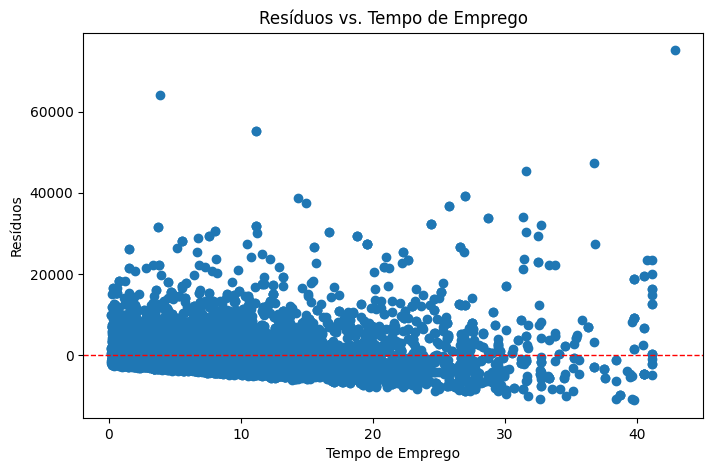

In [ ]:
# Remover valores nulos de tempo_emprego
df_clean = df.dropna(subset=['tempo_emprego'])

# Ajustar novamente o modelo simples com os dados limpos
model_simple = smf.ols("renda ~ tempo_emprego", data=df_clean).fit()

# Análise de resíduos do modelo simples
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['tempo_emprego'], model_simple.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
# Propor melhorias (exemplo: transformação logarítmica na renda)
df['log_renda'] = np.log(df['renda'] + 1)

# Novo modelo com transformação logarítmica
model_log_simple = smf.ols("log_renda ~ tempo_emprego", data=df).fit()
print("\nModelo com Transformação Logarítmica na Renda:")
print(model_log_simple.summary())



Modelo com Transformação Logarítmica na Renda:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:24:02   Log-Likelihood:                -13955.
No. Observations:               12466   AIC:                         2.791e+04
Df Residuals:                   12464   BIC:                         2.793e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:

# 3. Regressão linear múltipla: renda ~ todas as variáveis explicativas
# Corrigir nomes das colunas para evitar erros
df_dummies.columns = df_dummies.columns.str.replace(' ', '_').str.replace('ã', 'a').str.replace('ç', 'c').str.replace('é', 'e')

# Ajustar o modelo novamente com as variáveis corrigidas
model_multiple = smf.ols(
    "log_renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + " +
    " + ".join([col for col in df_dummies.columns if 'sexo_' in col or
                                                    'tipo_renda_' in col or
                                                    'educacao_' in col or
                                                    'estado_civil_' in col or
                                                    'tipo_residencia_' in col]),
    data=df_dummies
).fit()

print("\nModelo de Regressão Linear Múltipla:")
print(model_multiple.summary())



Modelo de Regressão Linear Múltipla:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:25:47   Log-Likelihood:                -13199.
No. Observations:               12466   AIC:                         2.645e+04
Df Residuals:                   12441   BIC:                         2.663e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
# Verificar as colunas dummies criadas
print("Colunas no DataFrame após transformação:")
print(df_dummies.columns.tolist())

Colunas no DataFrame após transformação:
['Unnamed:_0', 'data_ref', 'index', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda', 'log_renda', 'sexo_M', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor_público', 'educacao_Pós_graduacao', 'educacao_Secundário', 'educacao_Superior_completo', 'educacao_Superior_incompleto', 'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_Uniao', 'estado_civil_Viúvo', 'tipo_residencia_Casa', 'tipo_residencia_Com_os_pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']


In [ ]:

# Remover variáveis não significativas (p > 0.05) e ajustar novamente
# Novo modelo considerando apenas variáveis significativas
model_final = smf.ols("log_renda ~ idade + tempo_emprego + educacao_Superior_completo + estado_civil_Uniao", data=df_dummies).fit()
print("\nModelo Final de Regressão Linear Múltipla:")
print(model_final.summary())



Modelo Final de Regressão Linear Múltipla:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     545.2
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:28:54   Log-Likelihood:                -13919.
No. Observations:               12466   AIC:                         2.785e+04
Df Residuals:                   12461   BIC:                         2.789e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

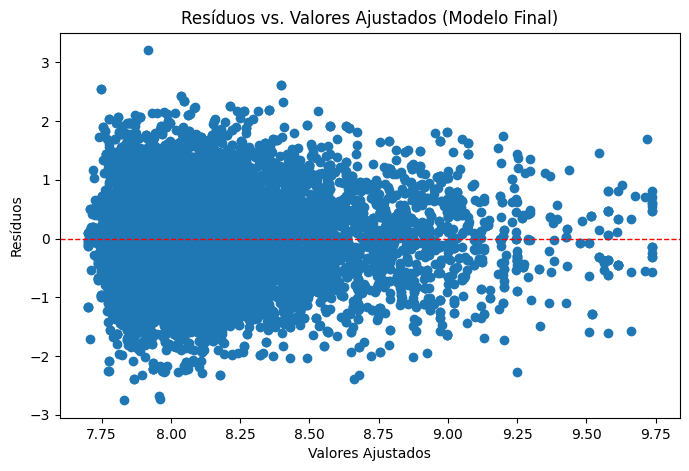

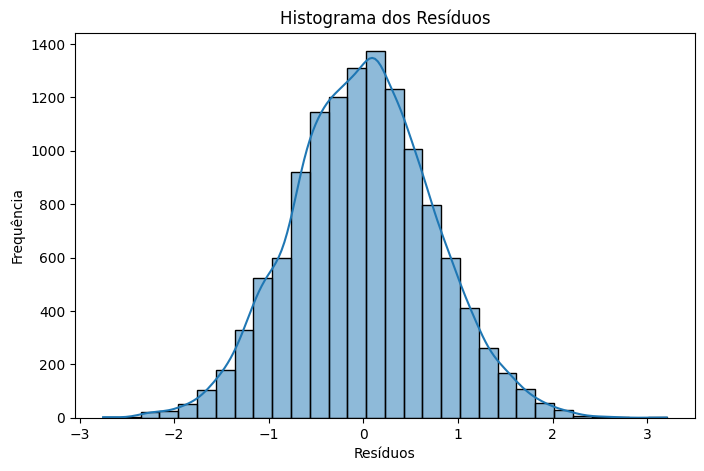


R² do Modelo Final: 0.14895423294444265
R² Ajustado do Modelo Final: 0.14868104595557963


In [ ]:

# 4. Análise de resíduos do modelo final
plt.figure(figsize=(8, 5))
plt.scatter(model_final.fittedvalues, model_final.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs. Valores Ajustados (Modelo Final)')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(8, 5))
sns.histplot(model_final.resid, kde=True, bins=30)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Qualidade do ajuste
print("\nR² do Modelo Final:", model_final.rsquared)
print("R² Ajustado do Modelo Final:", model_final.rsquared_adj)